In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from matplotlib.colors import LogNorm
import csv

In [2]:
# Read data from xlsx file

games = pd.read_excel('../Results.xlsx', sheet_name='Games')
turns = pd.read_excel('../Results.xlsx', sheet_name='Turns')
pve_games = games.query('GameState == "END" and (idPerson1 == 10 or idPerson2 == 10)'
                        ' and (idPerson1 not in [30, 203, 217]'
                        ' and idPerson2 not in [30, 203, 217])')
player_border_games = pve_games.query('idPerson1 == 10')
player_center_games = pve_games.query('idPerson2 == 10')
player_border_games_ids = player_border_games['idGame']
player_center_games_ids = player_center_games['idGame']

In [15]:
# Put data into arrays

player_border_turns = []
player_border_states = []
player_center_turns = []
player_center_states = []

player_center_choices = []
player_border_games_turns_timestamps = []
player_center_games_turns_timestamps = []

for i in player_border_games_ids:
    player_border_game_i_turns = turns.query('Games_idGame == ' + str(i))
    player_border_games_turns_timestamps.append(player_border_game_i_turns.sort_values(by='idTurn')['AddedTime'])
    for state in player_border_game_i_turns.sort_values(by='idTurn')['State']:
        player_border_states.append(state)
    player_border_turns.append(max(player_border_game_i_turns['idTurn']))

for i in player_center_games_ids:
    player_center_game_i_turns = turns.query('Games_idGame == ' + str(i))
    player_center_choices.append(player_center_game_i_turns.sort_values(by='idTurn')['Turn'])
    player_center_games_turns_timestamps.append(player_center_game_i_turns.sort_values(by='idTurn')['AddedTime'])
    for state in player_center_game_i_turns.sort_values(by='idTurn')['State']:
        player_center_states.append(state)
    player_center_turns.append(max(player_center_game_i_turns['idTurn']))

In [17]:
from compute_games_time import compute_games_time
all_time_border = 2 * compute_games_time(player_border_games_turns_timestamps)
print(all_time_border / 3600)
all_time_center = 2 * compute_games_time(player_center_games_turns_timestamps)
print(all_time_center / 3600)

27.412222222222223
38.25222222222222


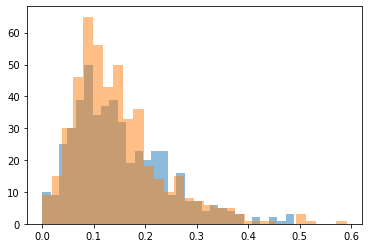

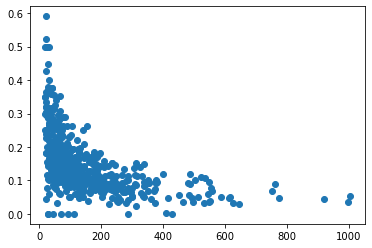

In [5]:
from digitalize_states import digitalize_states
max_corrs_left = []
max_corrs_right = []
corr_turn = []
for game_choices in player_center_choices:
    if len(game_choices) < 20:
        continue
    choices = digitalize_states(game_choices)
    cont_table = np.zeros((2, 2), dtype=np.int32)
    for i, j in choices:
        cont_table[i, j] += 1
    choices = np.array(choices).T
    import scipy
    choices = choices * 2 - 1
    c = np.correlate(choices[0].astype('float64'), choices[1].astype('float64'), 'full') / len(choices[0])
    max_corr_left = 0
    max_corr_right = 0
    for lag in range(1, 10 + 1):
        max_corr_left = max(max_corr_left, c[len(c) // 2 + lag])
        max_corr_right = max(max_corr_right, c[len(c) // 2 - lag])
    max_corrs_left.append(max_corr_left)
    max_corrs_right.append(max_corr_right)
    corr_turn.append(len(game_choices))
plt.hist(max_corrs_left, 30, alpha=0.5)
plt.hist(max_corrs_right, 30, alpha=0.5)
plt.figure()
#plt.scatter(max_corrs_left, max_corrs_right)
plt.scatter(corr_turn, max_corrs_right)

In [4]:
%load_ext autoreload
%autoreload 2
from get_prob_matrix import get_prob_matrix
from get_prob_matrix_symmetry import get_prob_matrix_symmetry
from get_fundamental_matrix import get_fundamental_matrix
from get_mean_time import get_mean_time
from get_games_strategy import get_games_strategy
from get_games_hist_2d import get_games_hist_2d

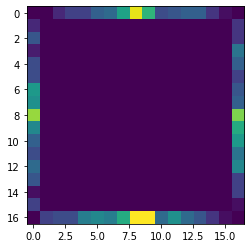

In [11]:
hist_2d_inner, hist_2d_border = get_games_hist_2d(N, player_border_states)
plt.imshow(hist_2d_border)

In [12]:
N = 16

hist_2d_inner, hist_2d_border = get_games_hist_2d(N, player_border_states)
pve_border_pmf = np.bincount(player_border_turns, minlength=10000) / len(player_border_turns)
qr_border, probability_matrix_border, counts_border = get_prob_matrix(N, player_border_states, return_counts=True)
qr_symm_border, probability_matrix_symm_border = get_prob_matrix_symmetry(N, player_border_states)
fundamental_matrix_border = get_fundamental_matrix(probability_matrix_border)
fundamental_matrix_symm_border = get_fundamental_matrix(probability_matrix_symm_border)
mean_time_border = get_mean_time(N - 1, fundamental_matrix_border)
mean_time_symm_border = get_mean_time(N - 1, fundamental_matrix_symm_border)
strategy_border, _ = get_games_strategy(N, player_border_states)

np.save('../data/qr_counts_pve_border.npy', counts_border)
np.save('../data/qr_pve_border.npy', qr_border)
np.save('../data/qr_pve_symm_border.npy', qr_symm_border)
np.save('../data/strategy_pve_border.npy', strategy_border)
np.save('../data/experiment_pve_border_pmf.npy', pve_border_pmf)
np.save('../data/experiment_pve_border_hist_2d_inner.npy', hist_2d_inner)
np.save('../data/experiment_pve_border_hist_2d_border.npy', hist_2d_border)

print(len(player_border_turns))

print("mean time, player border: ", mean_time_border)
print("mean time symm, player border: ", mean_time_symm_border)

even = 0
odd = 0
for i in player_border_turns:
    if i % 2 == 0:
        even +=1
    else:
        odd +=1 
print(even / len(player_border_turns))
print(odd / len(player_border_turns))

534
mean time, player border:  71.11610486891385
mean time symm, player border:  71.11610486891392
0.5131086142322098
0.4868913857677903


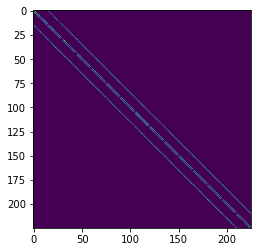

In [8]:
plt.imshow(probability_matrix_border)

In [24]:
from digitalize_states import digitalize_states
help(digitalize_states)

Help on function digitalize_states in module digitalize_states:

digitalize_states(series)



In [6]:
np.mean(player_border_turns)

71.11610486891385

In [16]:
player_center_states[0]

'[8,8]'

In [14]:
N = 16

hist_2d_inner, hist_2d_border = get_games_hist_2d(N, player_center_states)
pve_center_pmf = np.bincount(player_center_turns, minlength=10000) / len(player_center_turns)
qr_center, probability_matrix_center, counts_center = get_prob_matrix(N, player_center_states, return_counts=True)
qr_symm_center, probability_matrix_symm_center = get_prob_matrix_symmetry(N, player_center_states)
fundamental_matrix_center = get_fundamental_matrix(probability_matrix_center)
fundamental_matrix_symm_center = get_fundamental_matrix(probability_matrix_symm_center)
mean_time_center = get_mean_time(N - 1, fundamental_matrix_center)
mean_time_symm_center = get_mean_time(N - 1, fundamental_matrix_symm_center)

_, strategy_center = get_games_strategy(N, player_center_states)

np.save('../data/qr_counts_pve_center.npy', counts_center)
np.save('../data/qr_pve_center.npy', qr_center)
np.save('../data/qr_pve_symm_center.npy', qr_symm_center)
np.save('../data/strategy_pve_center.npy', strategy_center)
np.save('../data/experiment_pve_center_pmf.npy', pve_center_pmf)
np.save('../data/experiment_pve_center_hist_2d_inner.npy', hist_2d_inner)
np.save('../data/experiment_pve_center_hist_2d_border.npy', hist_2d_border)


print(len(player_center_turns))

print("mean time, player center: ", mean_time_center)
print("mean time symm, player center: ", mean_time_symm_center)

even = 0
odd = 0
for i in player_center_turns:
    if i % 2 == 0:
        even +=1
    else:
        odd +=1 
print(even / len(player_center_turns))
print(odd / len(player_center_turns))

528
mean time, player center:  145.44886363636346
mean time symm, player center:  145.4488636363639
0.30492424242424243
0.6950757575757576


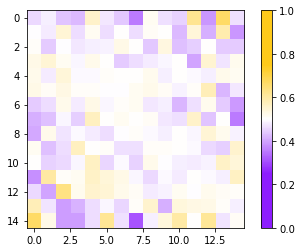

In [8]:
import matplotlib.colors as mcolors
border_color = np.array([141, 29, 255]) / 255.0
white_color = np.array([255, 255, 255]) / 255.0
center_color = np.array([255, 202, 26]) / 255.0
rwgame_cmap = mcolors.LinearSegmentedColormap.from_list(
    'rwgame', [border_color, border_color, white_color, center_color, center_color])
plt.imshow(_[1:-1, 1:-1], cmap=rwgame_cmap, vmin=0, vmax=1)
plt.colorbar()

In [ ]:
make_prob_matrix(N, strategy_center, strategy_border)

In [14]:
np.mean(player_center_turns)

145.44886363636363

In [7]:
# heatmap
from digitalize_states import digitalize_states
from convert_games2states import convert_games2states
from get_all_games import get_all_games
from get_game_trajectories import get_game_trajectories


states_border = digitalize_states(player_border_states)

player_border_states = np.empty((17,17))
for i in range(0, 17):
    for j in range (0, 17):
        player_border_states[i, j] = states_border.count((i, j)) / len(states_border)


player_border_states_symm = convert_games2states(get_all_games(N, get_game_trajectories(states_border)))
player_border_symm = np.empty((17, 17))
for i in np.arange(0, 17):
    for j in np.arange (0, 17):
        player_border_symm[i, j] = player_border_states_symm.count((i, j)) / len(player_border_states_symm)
        

states_center = digitalize_states(player_center_states)

player_center_states = np.empty((17,17))
for i in range(0, 17):
    for j in range (0, 17):
        player_center_states[i, j] = states_center.count((i, j)) / len(states_center)


player_center_states_symm = convert_games2states(get_all_games(N, get_game_trajectories(states_center)))
player_center_symm = np.empty((17, 17))
for i in np.arange(0, 17):
    for j in np.arange (0, 17):
        player_center_symm[i, j] = player_center_states_symm.count((i, j)) / len(player_center_states_symm)

In [10]:
# for trajectories

from find_closest import find_closest
from write_states2csv import write_states2csv

games = get_game_trajectories(states_border)

k = 0
for i in range (0, 7):
    k += ((-1) ** i) * i
    closest2short_index = find_closest(np.quantile(player_border_turns, 0.25) + k, player_border_turns)
    closest2mean_index = find_closest(mean_time_border + k, player_border_turns)
    closest2long_index = find_closest(np.quantile(player_border_turns, 0.75) + k, player_border_turns)

    short_game = games[closest2short_index]
    regular_game = games[closest2mean_index]
    long_game = games[closest2long_index]

    write_states2csv("PvE_border", "short", short_game, i)
    write_states2csv("PvE_border", "regular", regular_game, i)
    write_states2csv("PvE_border", "long", long_game, i)

games = get_game_trajectories(states_center)

k = 0
for i in range (0, 7):
    k += ((-1) ** i) * i
    closest2short_index = find_closest(np.quantile(player_center_turns, 0.25) + k, player_center_turns)
    closest2mean_index = find_closest(mean_time_center + k, player_center_turns)
    closest2long_index = find_closest(np.quantile(player_center_turns, 0.75) + k, player_center_turns)

    short_game = games[closest2short_index]
    regular_game = games[closest2mean_index]
    long_game = games[closest2long_index]

    write_states2csv("PvE_center", "short", short_game, i)
    write_states2csv("PvE_center", "regular", regular_game, i)
    write_states2csv("PvE_center", "long", long_game, i)

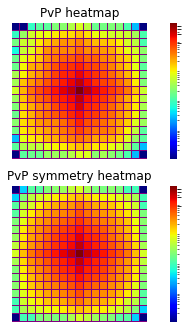

In [9]:
fig, axes = plt.subplots(2, figsize=(8.27, 5.5))
plt.rcParams['figure.dpi'] = 300

sns.heatmap(player_border_states + 1e-6, cmap='jet', linecolor='purple', 
            linewidth=0.05, ax=axes[0], square=True, xticklabels=False, yticklabels=False, norm=LogNorm())
axes[0].set_title("PvP heatmap")
sns.heatmap(player_border_symm + 1e-6, cmap='jet', linecolor='purple', 
            linewidth=0.05, ax=axes[1], square=True,  xticklabels=False, yticklabels=False, norm=LogNorm())
axes[1].set_title("PvP symmetry heatmap")
plt.show()

In [9]:
from generate_distribution import generate_distribution

In [10]:
gen_turns_border, sample_games_border = generate_distribution(N, qr_border)
gen_turns_symm_border, _ = generate_distribution(N, qr_symm_border)

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:23<00:00, 4272.38it/s]


In [15]:
gen_turns_center, sample_games_center = generate_distribution(N, qr_center)
gen_turns_symm_center, _ = generate_distribution(N, qr_symm_center)

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:53<00:00, 1871.56it/s]


In [14]:
# For trajectories

k = 0
for i in range (0, 7):
    k += ((-1) ** i) * i
    closest2short_index = find_closest(np.quantile(gen_turns_border, 0.25) + k, gen_turns_border)
    closest2mean_index = find_closest(np.mean(gen_turns_border) + k, gen_turns_border)
    closest2long_index = find_closest(np.quantile(gen_turns_border, 0.75) + k, gen_turns_border)

    short_game = sample_games_border[closest2short_index]
    regular_game = sample_games_border[closest2mean_index]
    long_game = sample_games_border[closest2long_index]

    write_states2csv("PvE_border_sampling", "short", short_game, i)
    write_states2csv("PvE_border_sampling", "regular", regular_game, i)
    write_states2csv("PvE_border_sampling", "long", long_game, i)

k = 0
for i in range (0, 7):
    k += ((-1) ** i) * i
    closest2short_index = find_closest(np.quantile(gen_turns_center, 0.25) + k, gen_turns_center)
    closest2mean_index = find_closest(np.mean(gen_turns_center) + k, gen_turns_center)
    closest2long_index = find_closest(np.quantile(gen_turns_center, 0.75) + k, gen_turns_center)

    short_game = sample_games_center[closest2short_index]
    regular_game = sample_games_center[closest2mean_index]
    long_game = sample_games_center[closest2long_index]

    write_states2csv("PvE_center_sampling", "short", short_game, i)
    write_states2csv("PvE_center_sampling", "regular", regular_game, i)
    write_states2csv("PvE_center_sampling", "long", long_game, i)

In [16]:
print(np.mean(gen_turns_border))
print(np.mean(gen_turns_symm_border))
even = 0
odd = 0
even_symm = 0
odd_symm = 0
for i in gen_turns_border:
    if i % 2 == 0:
        even += 1
    else:
        odd += 1
         
for i in gen_turns_symm_border:
    if i % 2 == 0:
        even_symm += 1
    else:
        odd_symm += 1
        
print(even / len(gen_turns_border))
print(odd / len(gen_turns_border))
print(even_symm / len(gen_turns_symm_border))
print(odd_symm / len(gen_turns_symm_border))

71.04289
70.7337
0.51481
0.48519
0.51478
0.48522


In [17]:
print(np.mean(gen_turns_center))
print(np.mean(gen_turns_symm_center))
even = 0
odd = 0
even_symm = 0
odd_symm = 0
for i in gen_turns_center:
    if i % 2 == 0:
        even += 1
    else:
        odd += 1
         
for i in gen_turns_symm_center:
    if i % 2 == 0:
        even_symm += 1
    else:
        odd_symm += 1
        
print(even / len(gen_turns_center))
print(odd / len(gen_turns_center))
print(even_symm / len(gen_turns_symm_center))
print(odd_symm / len(gen_turns_symm_center))

145.67101
146.10549
0.30457
0.69543
0.30355
0.69645


In [15]:
xtick = 50
bin_width = 16

bins_ranges_border = []
bins_ranges_center = []
gen_turns_count = []

for i in np.arange(8, max(gen_turns_border)+bin_width, bin_width):
    bins_ranges_border.append(i)
for i in np.arange(8, max(gen_turns_center)+bin_width, bin_width):
    bins_ranges_center.append(i)

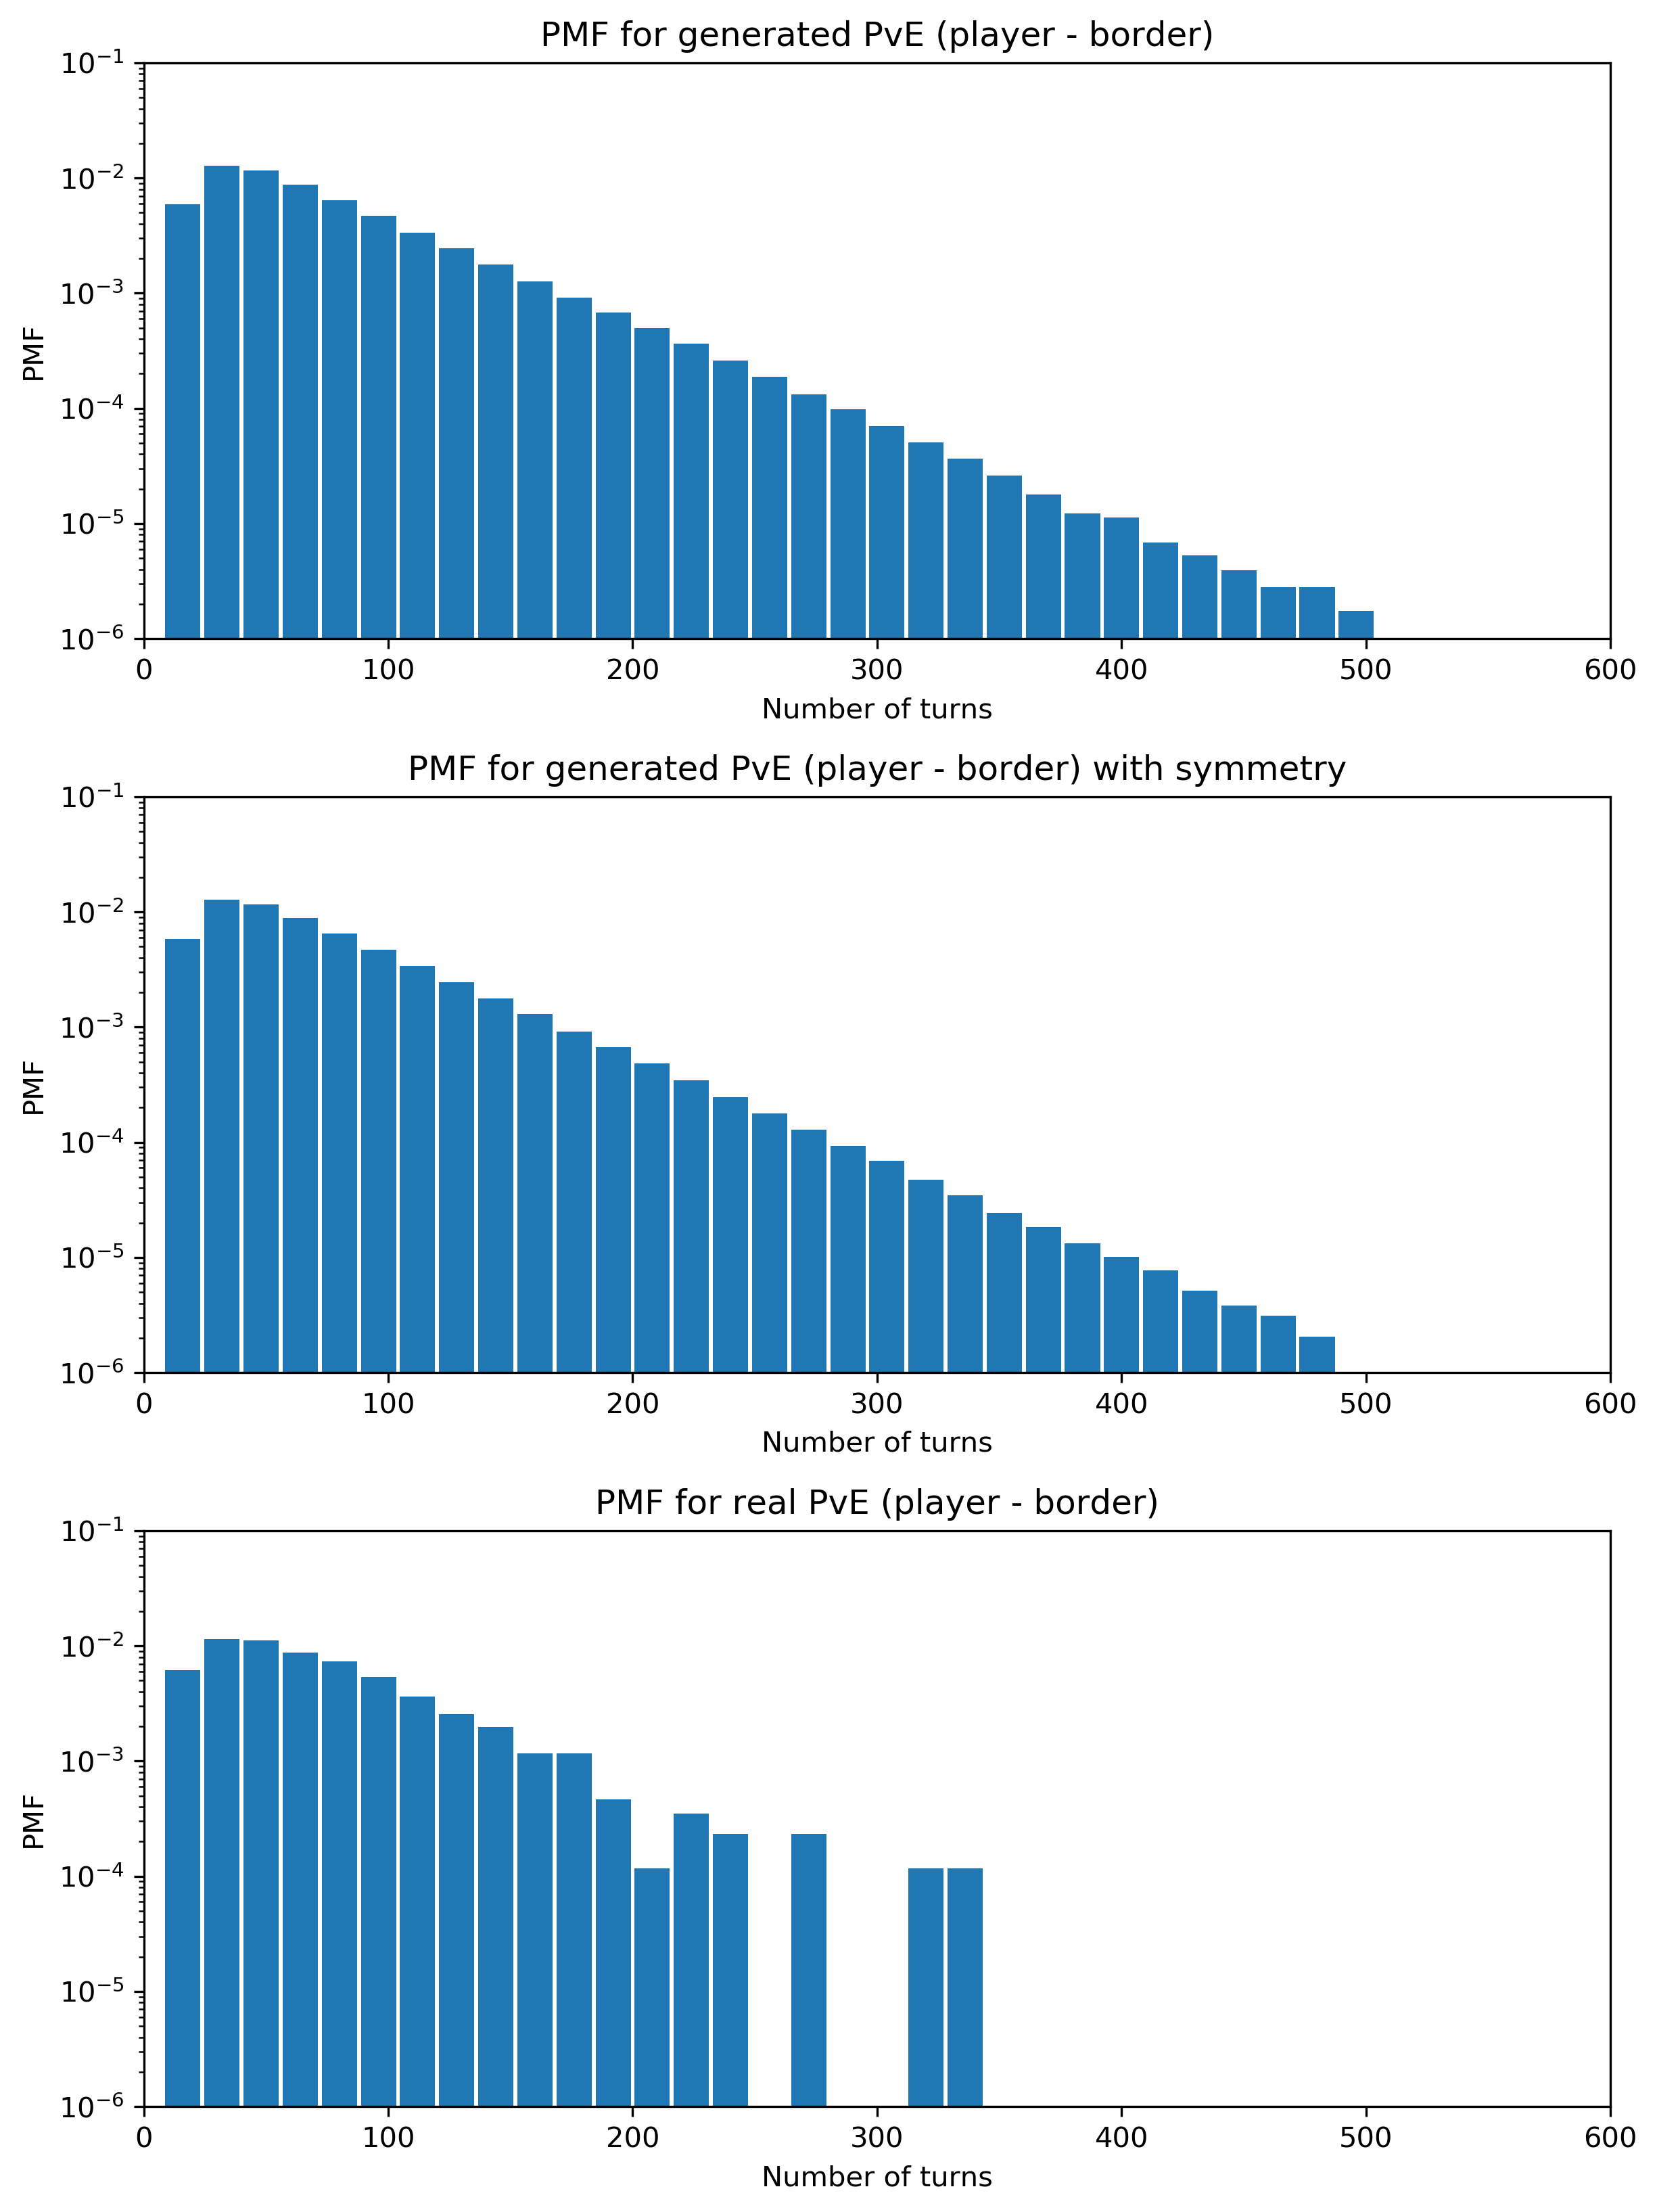

In [16]:
fig, axes = plt.subplots(3, figsize=(8.27, 11))
plt.rcParams['figure.dpi'] = 300
max_x = 600 #max(player_border_turns)

axes[0].set_yscale("log")
axes[0].set_xlabel("Number of turns")
axes[0].set_ylabel("PMF")
axes[0].set_title("PMF for generated PvE (player - border)")
axes[0].set_ylim(ymin = 0.000001, ymax = 0.1)
axes[0].set_xlim(xmin = 0, xmax = max_x)
n_pvp_gen, bins_pvp_gen, patches_pvp_gen = axes[0].hist(gen_turns_border, 
                                                        bins=bins_ranges_border, 
                                                        rwidth=0.9, density=True) 
axes[1].set_yscale("log")
axes[1].set_xlabel("Number of turns")
axes[1].set_ylabel("PMF")
axes[1].set_title("PMF for generated PvE (player - border) with symmetry")
axes[1].set_ylim(ymin = 0.000001, ymax = 0.1)
axes[1].set_xlim(xmin = 0, xmax = max_x)
n_pvp_gen_symm, bins_pvp_gen_symm, patches_pvp_gen_symm = axes[1].hist(gen_turns_symm_border, 
                                                                       bins=bins_ranges_border, 
                                                                       rwidth=0.9, density=True) 
axes[2].set_yscale("log")
axes[2].set_xlabel("Number of turns")
axes[2].set_ylabel("PMF")
axes[2].set_title("PMF for real PvE (player - border)")
axes[2].set_ylim(ymin = 0.000001, ymax = 0.1)
axes[2].set_xlim(xmin = 0, xmax = max_x)
n_pvp, bins_pvp, patches_pvp = axes[2].hist(player_border_turns, 
                                            bins=bins_ranges_border, 
                                            rwidth=0.9, density=True)
fig.tight_layout()
plt.show()

In [11]:
from model_pvp import model_pvp

In [12]:
d_border, prob_border, (even_border, odd_border) = model_pvp(N, qr_border)
d_symm_border, prob_symm_border, (even_symm_border, odd_symm_border) = model_pvp(N, qr_symm_border)

In [20]:
d_center, prob_center, (even_center, odd_center) = model_pvp(N, qr_center)
d_symm_center, prob_symm_center, (even_symm_center, odd_symm_center) = model_pvp(N, qr_symm_center)

In [21]:
print(sum(d_border))
print(sum(d_symm_border))
print(sum(d_center))
print(sum(d_symm_center))

71.1161048689136
71.1161048689136
145.44886363636272
145.4488636363633


In [22]:
print(even_border)
print(odd_border)
print(even_symm_border)
print(odd_symm_border)
print("------")
print(even_center)
print(odd_center)
print(even_symm_center)
print(odd_symm_center)

0.5131086142322095
0.48689138576778945
0.5131086142322081
0.48689138576779073
------
0.3049242424242409
0.6950757575757576
0.3049242424242414
0.6950757575757569


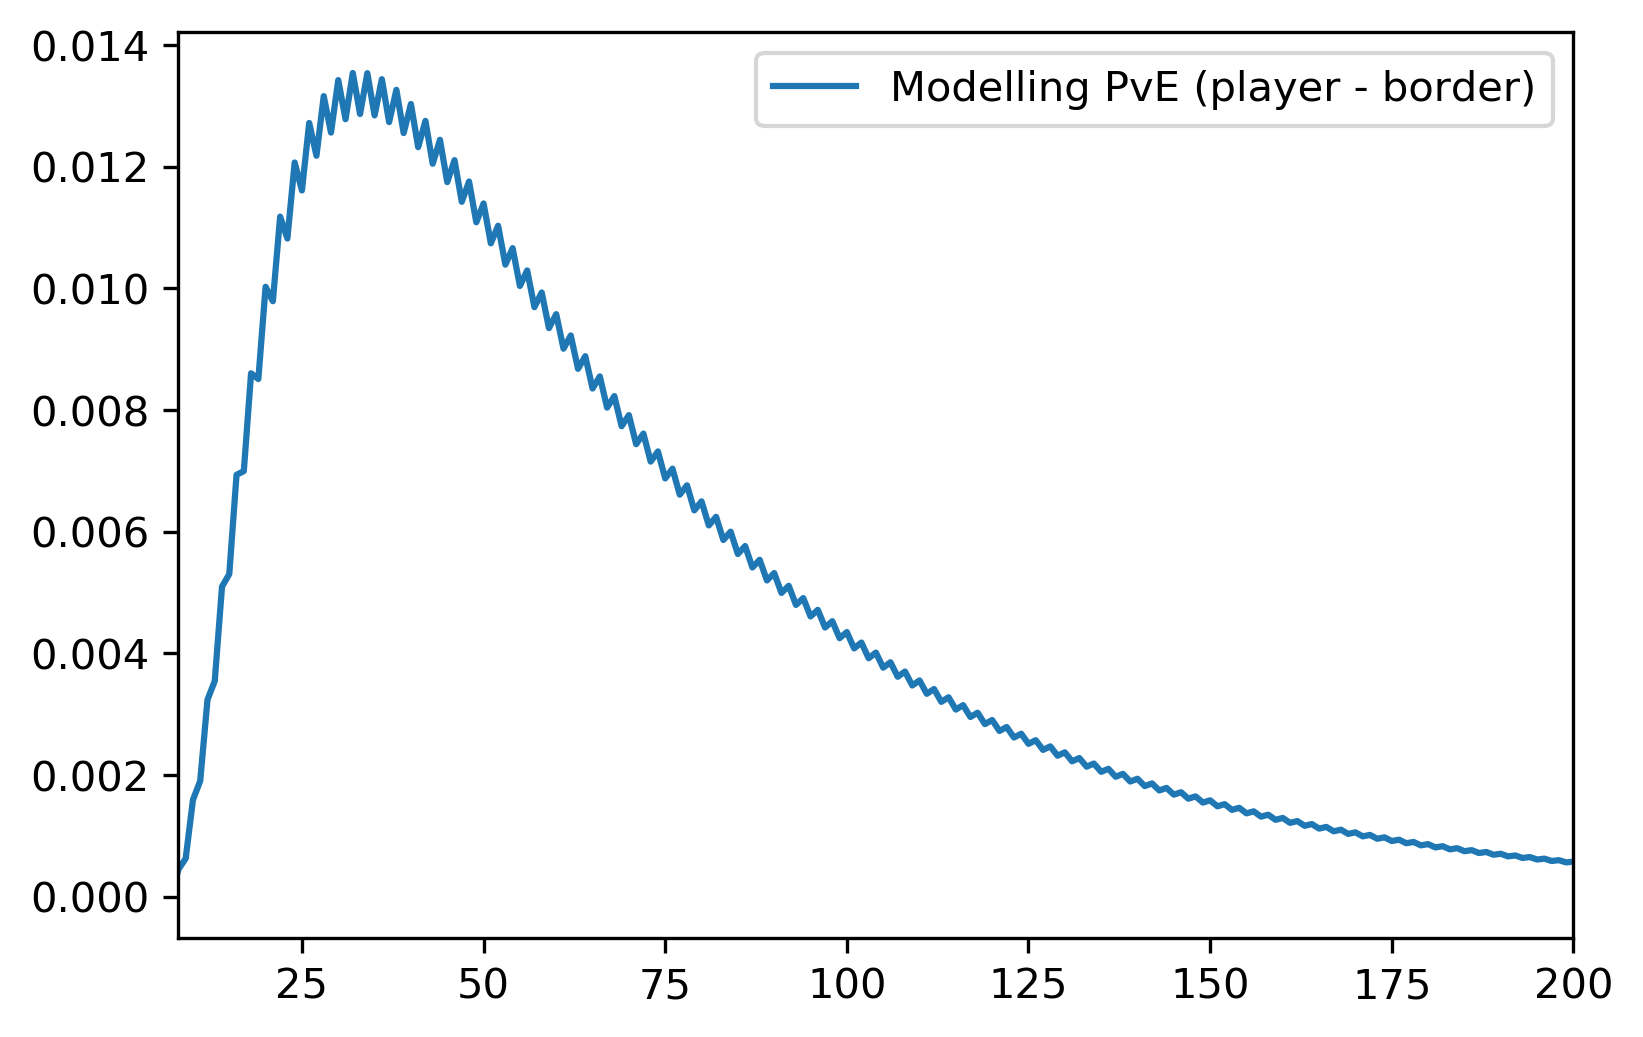

In [22]:
plt.plot(prob_border, label="Modelling PvE (player - border)")
plt.xlim([8, 200])
plt.legend()
#plt.ylim(ymin = 0.000001, ymax = 0.01)
#plt.yscale("log")
plt.show()

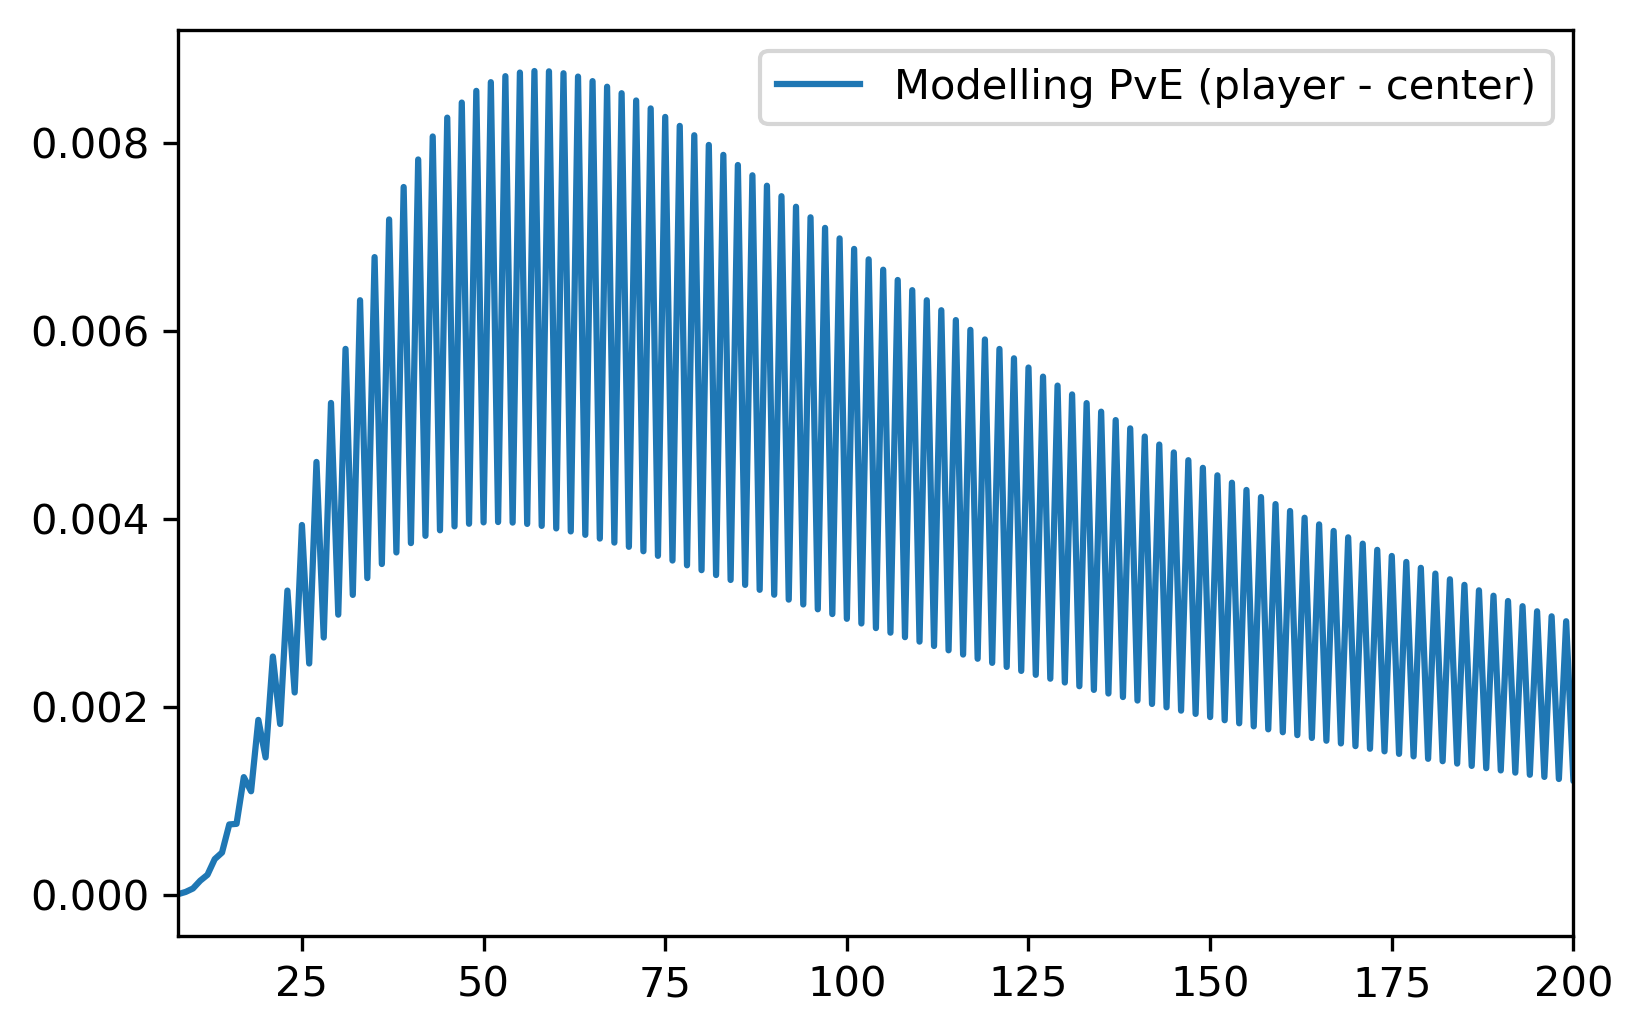

In [23]:
plt.plot(prob_center, label="Modelling PvE (player - center)")
plt.xlim([8, 200])
plt.legend()
#plt.ylim(ymin = 0.000001, ymax = 0.01)
#plt.yscale("log")
plt.show()

In [24]:
start_point = 40
end_point = 400

pve_border_count = []
uniques_border = np.array(gen_turns_border)
uniques_border = np.unique(uniques_border)
for i in uniques_border:
    pve_border_count.append(gen_turns_border.count(i) / len(gen_turns_border))
    
pve_border_count_symm = []
uniques_symm_border = np.array(gen_turns_symm_border)
uniques_symm_border = np.unique(uniques_symm_border)
for i in uniques_symm_border:
    pve_border_count_symm.append(gen_turns_symm_border.count(i) / len(gen_turns_symm_border))

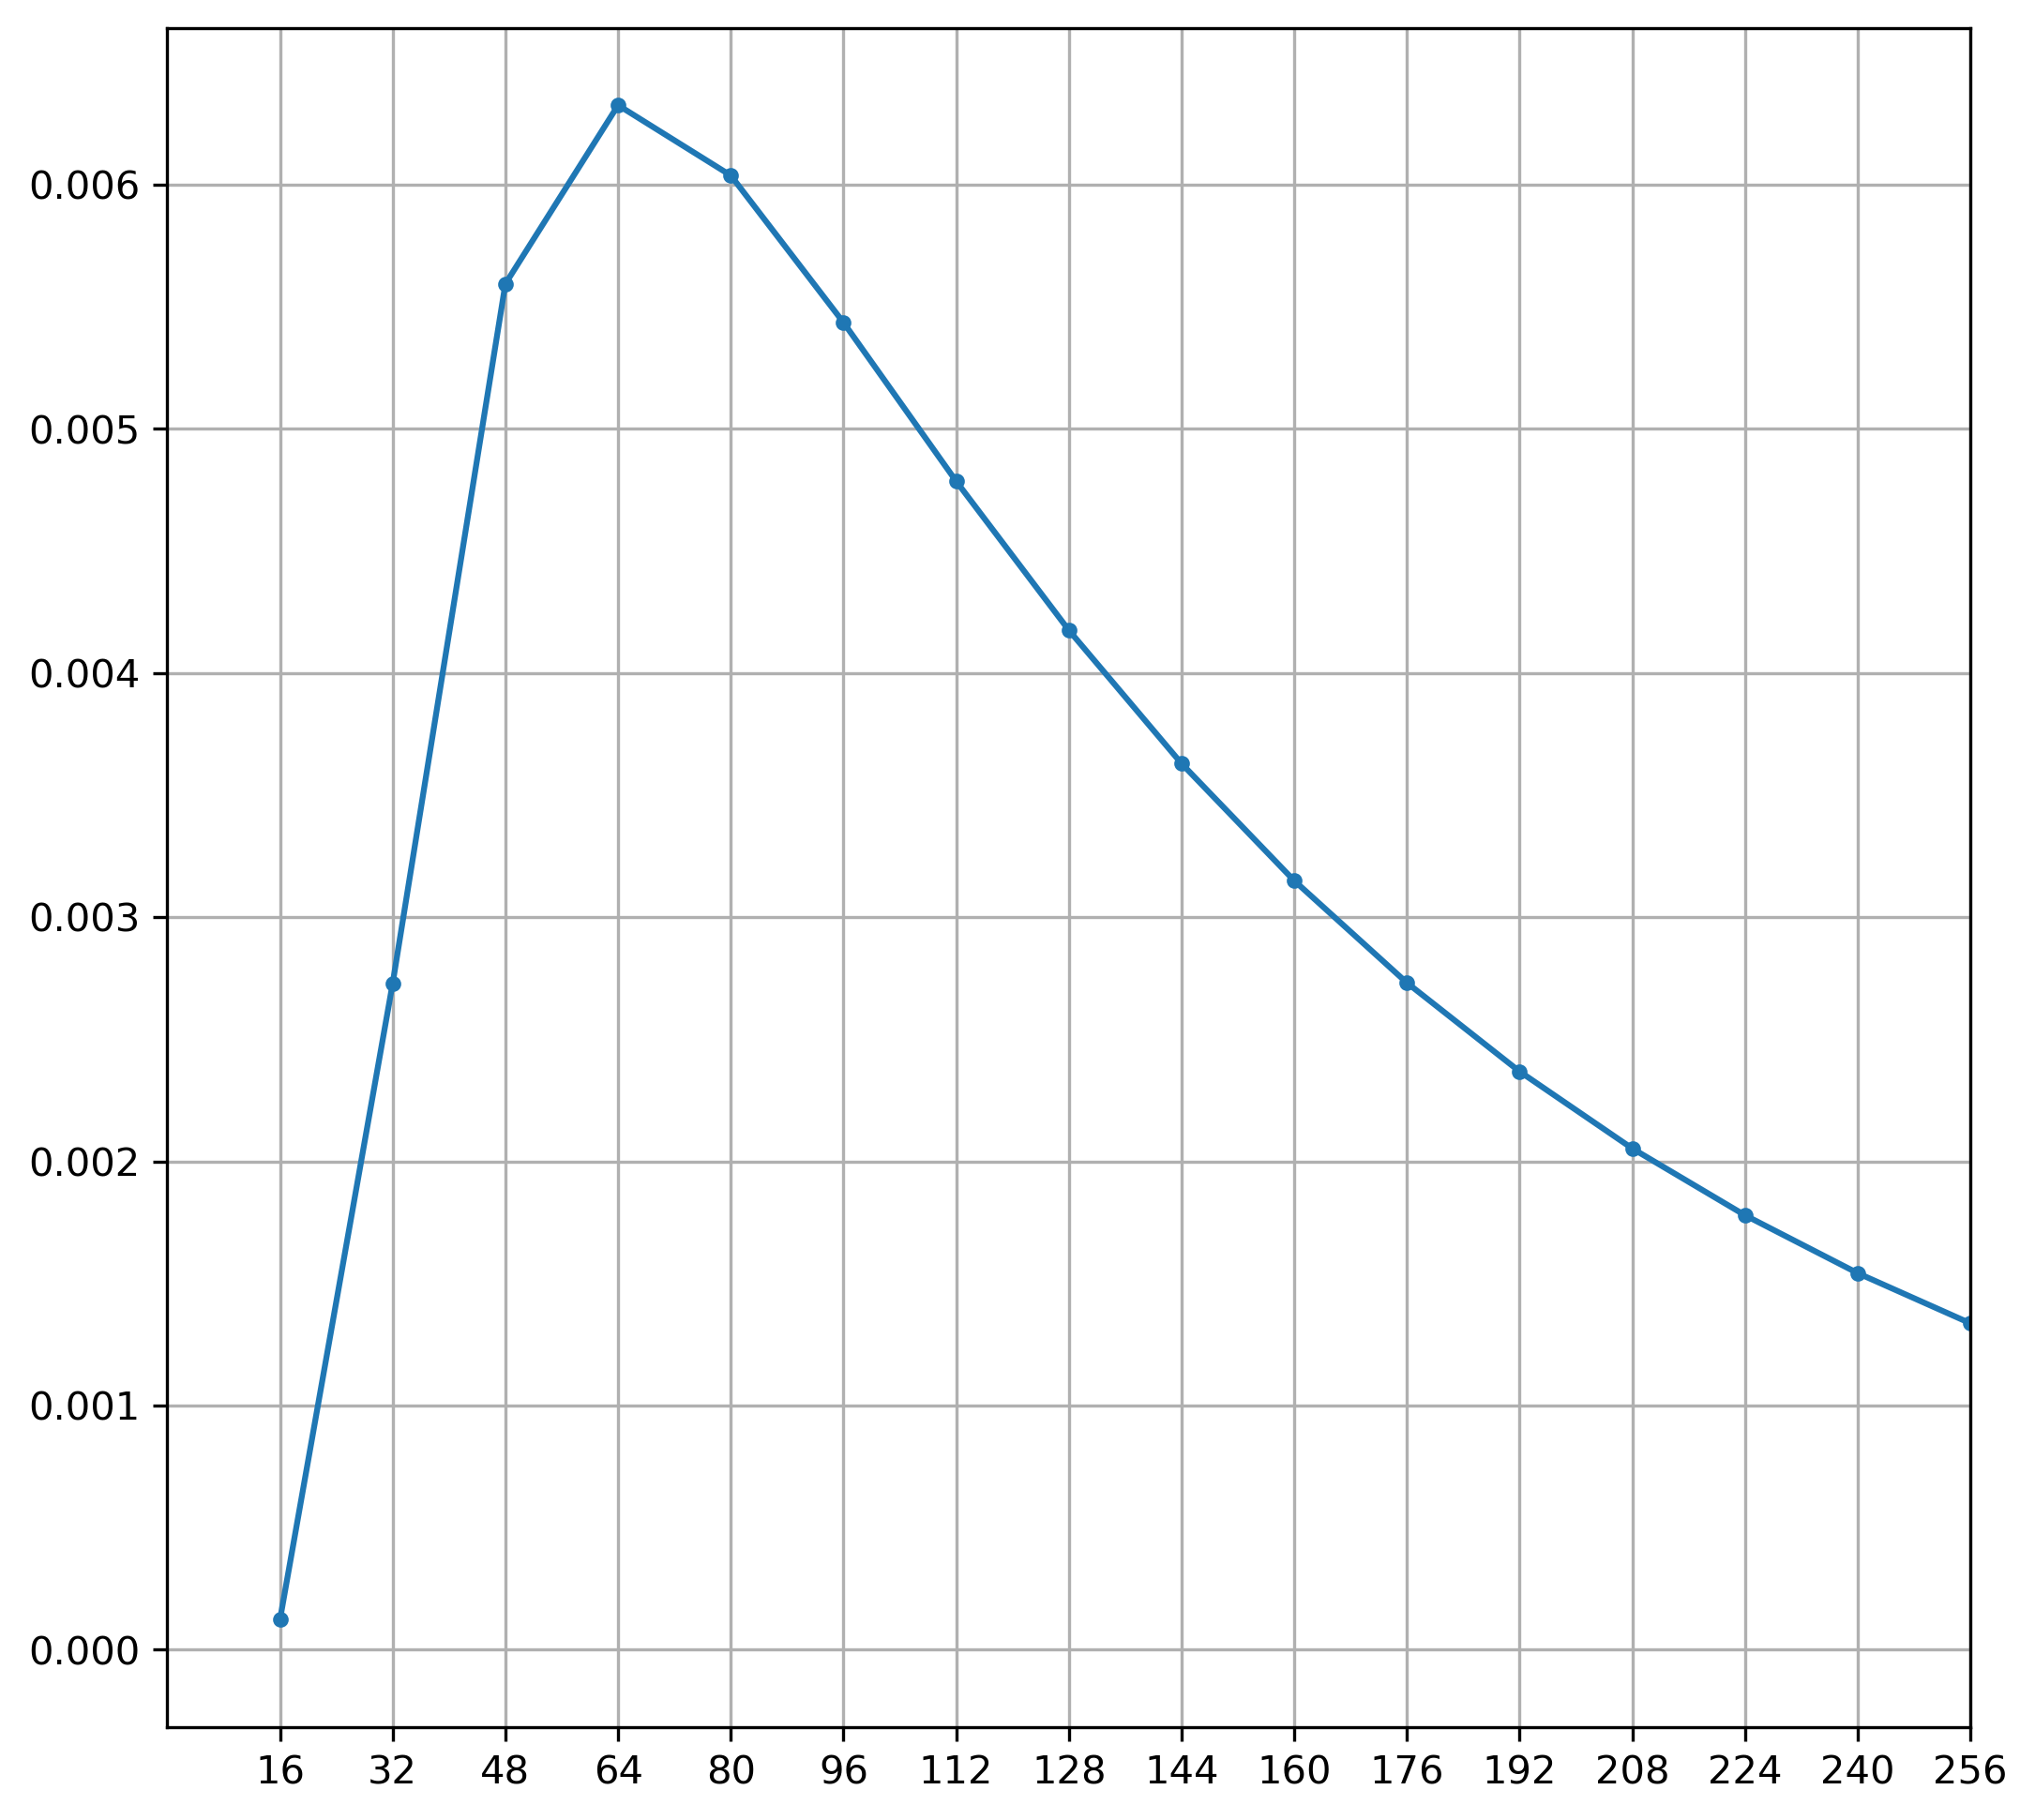

In [25]:
plt.rcParams['figure.figsize']=(8.27, 8)
plt.rcParams['figure.dpi'] = 300
plt.xlim(0, 200)

plt.grid()

xs_center = []
ys_center = []
x0 = 8 + bin_width / 2
for i in range (0, len(prob_center) // bin_width):
    xs_center.append(x0 + bin_width * i)
for i in range (0, len(prob_symm_center) // bin_width):
    ys_center.append(sum(prob_symm_center[bin_width * i : bin_width * (i + 1)]) / bin_width)
plt.plot(xs_center, ys_center,'.-')
#plt.yscale("log")
plt.xticks(xs_center[0:16])
plt.show()

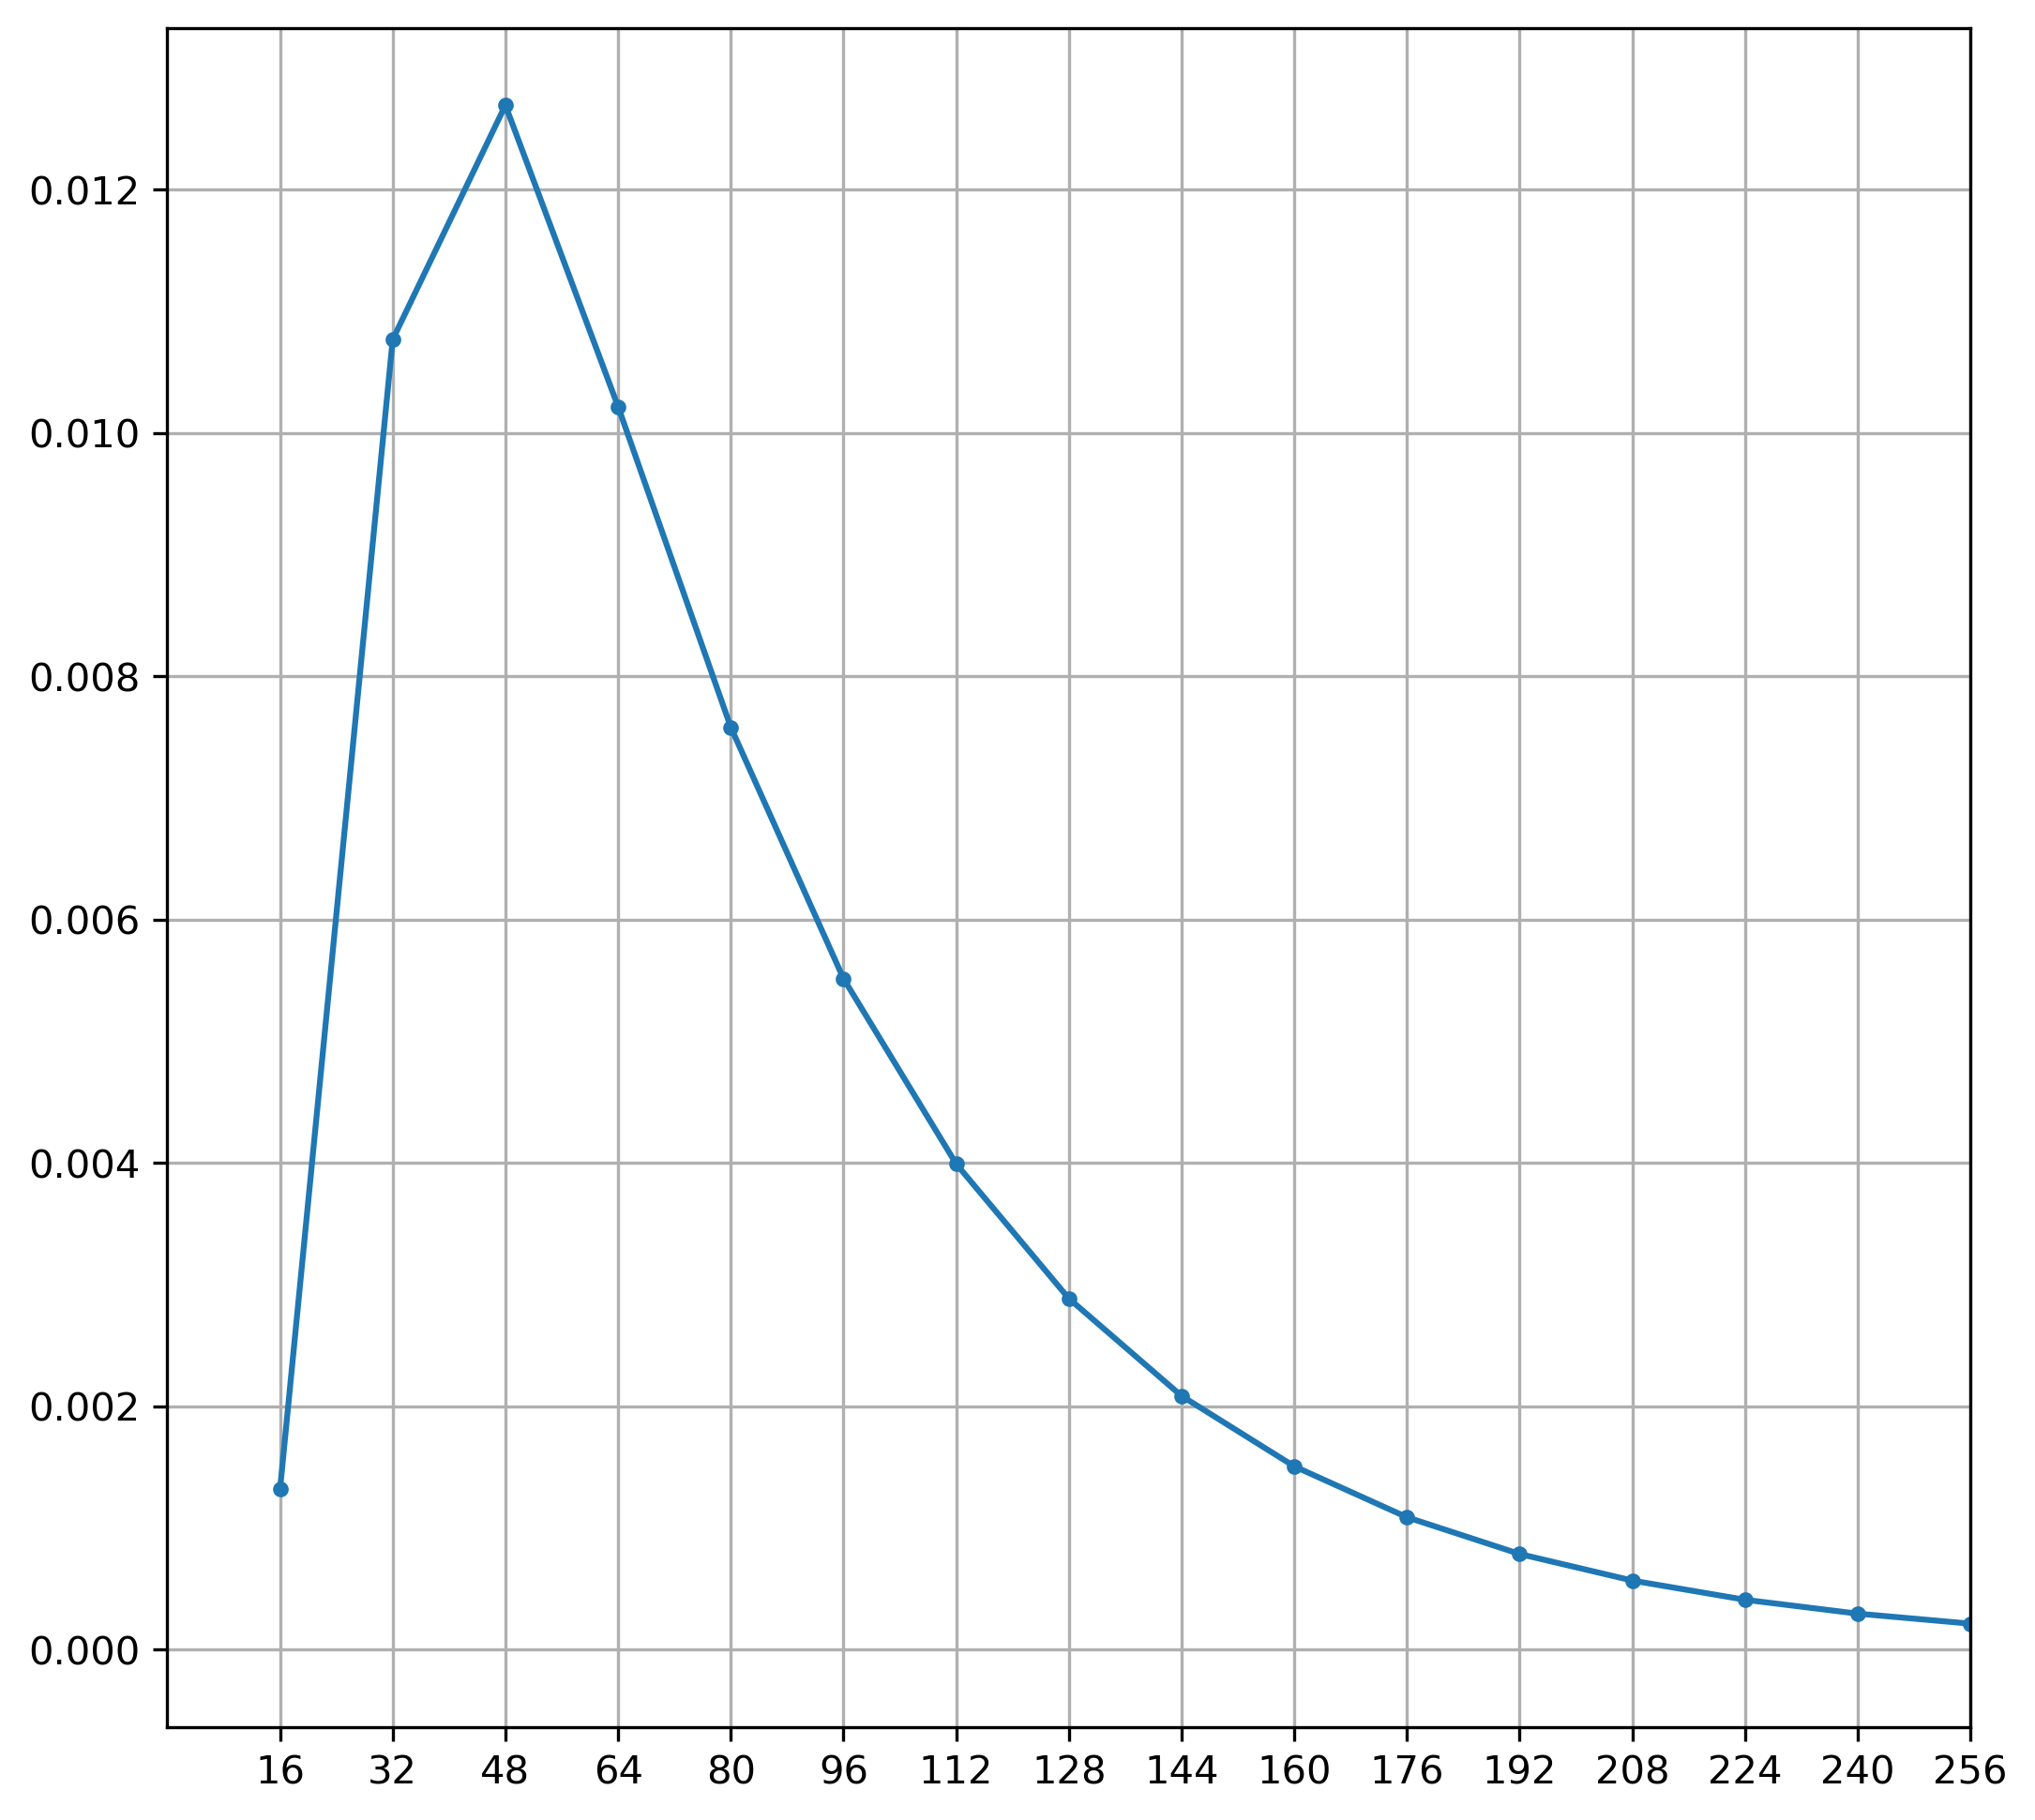

In [26]:
plt.rcParams['figure.figsize']=(8.27, 8)
plt.rcParams['figure.dpi'] = 300
plt.xlim(0, 200)

plt.grid()

xs_border = []
ys_border = []
x0 = 8 + bin_width / 2
for i in range (0, len(prob_border) // bin_width):
    xs_border.append(x0 + bin_width * i)
for i in range (0, len(prob_symm_border) // bin_width):
    ys_border.append(sum(prob_symm_border[bin_width * i : bin_width * (i + 1)]) / bin_width)
plt.plot(xs_border, ys_border,'.-')
#plt.yscale("log")
plt.xticks(xs_border[0:16])
plt.show()

In [27]:
xs_ys_border = [[],[]]
xs_ys_border[0].append("x")
xs_ys_border[1].append("y")
xs_ys_border[0].extend(xs_border)
xs_ys_border[1].extend(ys_border)
xs_ys_border = np.array(xs_ys_border)
xs_ys_border = np.transpose(xs_ys_border)

xs_ys_center = [[],[]]
xs_ys_center[0].append("x")
xs_ys_center[1].append("y")
xs_ys_center[0].extend(xs_center)
xs_ys_center[1].extend(ys_center)
xs_ys_center = np.array(xs_ys_center)
xs_ys_center = np.transpose(xs_ys_center)

with open("../csv/pve_border_model.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(xs_ys_border)
    
with open("../csv/pve_center_model.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(xs_ys_center)

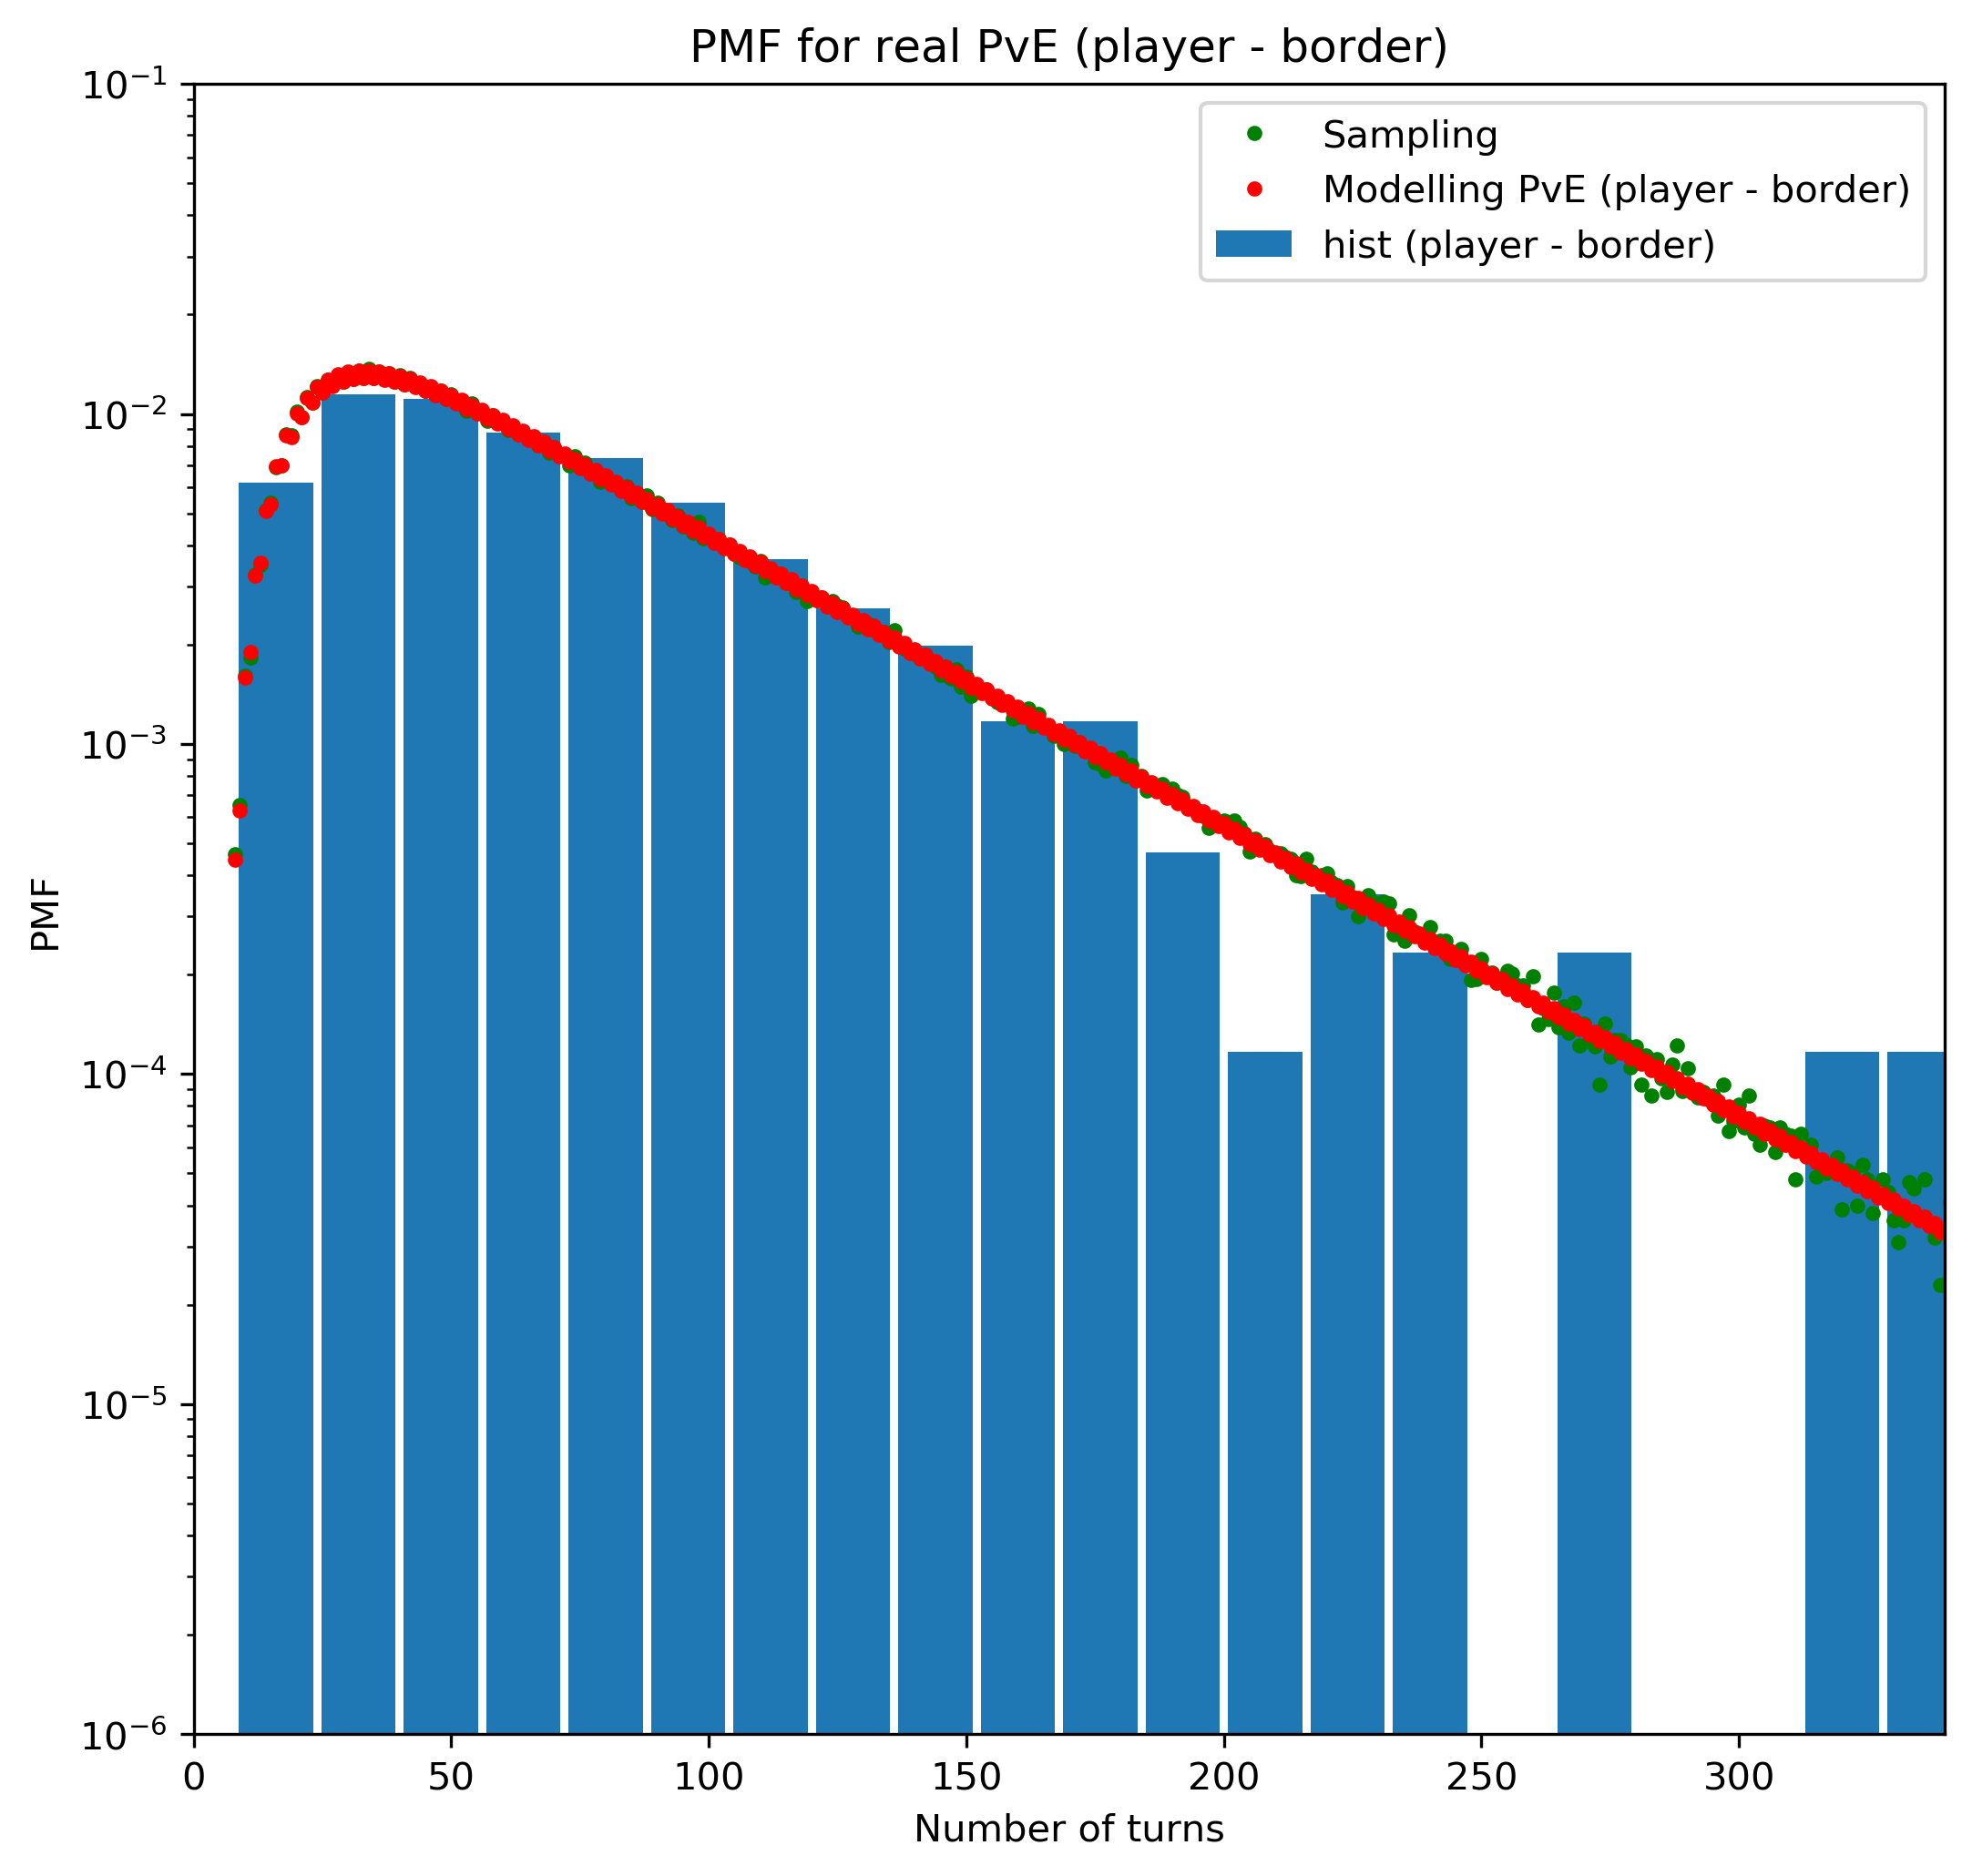

In [28]:
plt.plot(uniques_border, pve_border_count, 'g.', label="Sampling")
plt.xlim([0, max(player_border_turns)])

plt.yscale("log")
plt.xlabel("Number of turns")
plt.ylabel("PMF")
plt.title("PMF for real PvE (player - border)")
plt.ylim(ymin = 0.000001, ymax = 0.1)
plt.hist(player_border_turns, bins=bins_ranges_border, rwidth=0.9, density=True, label="hist (player - border)")

plt.plot(prob_border, 'r.', label="Modelling PvE (player - border)")
plt.legend()
#pvp_count = np.array(pvp_count)
#pvp_count = pvp_count / sum(pvp_count)
plt.show()

In [29]:
pve_center_count = []
uniques_center = np.array(gen_turns_center)
uniques_center = np.unique(uniques_center)
for i in uniques_center:
    pve_center_count.append(gen_turns_center.count(i) / len(gen_turns_center))
    
pve_center_count_symm = []
uniques_symm_center = np.array(gen_turns_symm_center)
uniques_symm_center = np.unique(uniques_symm_center)
for i in uniques_symm_center:
    pve_center_count_symm.append(gen_turns_symm_center.count(i) / len(gen_turns_symm_center))

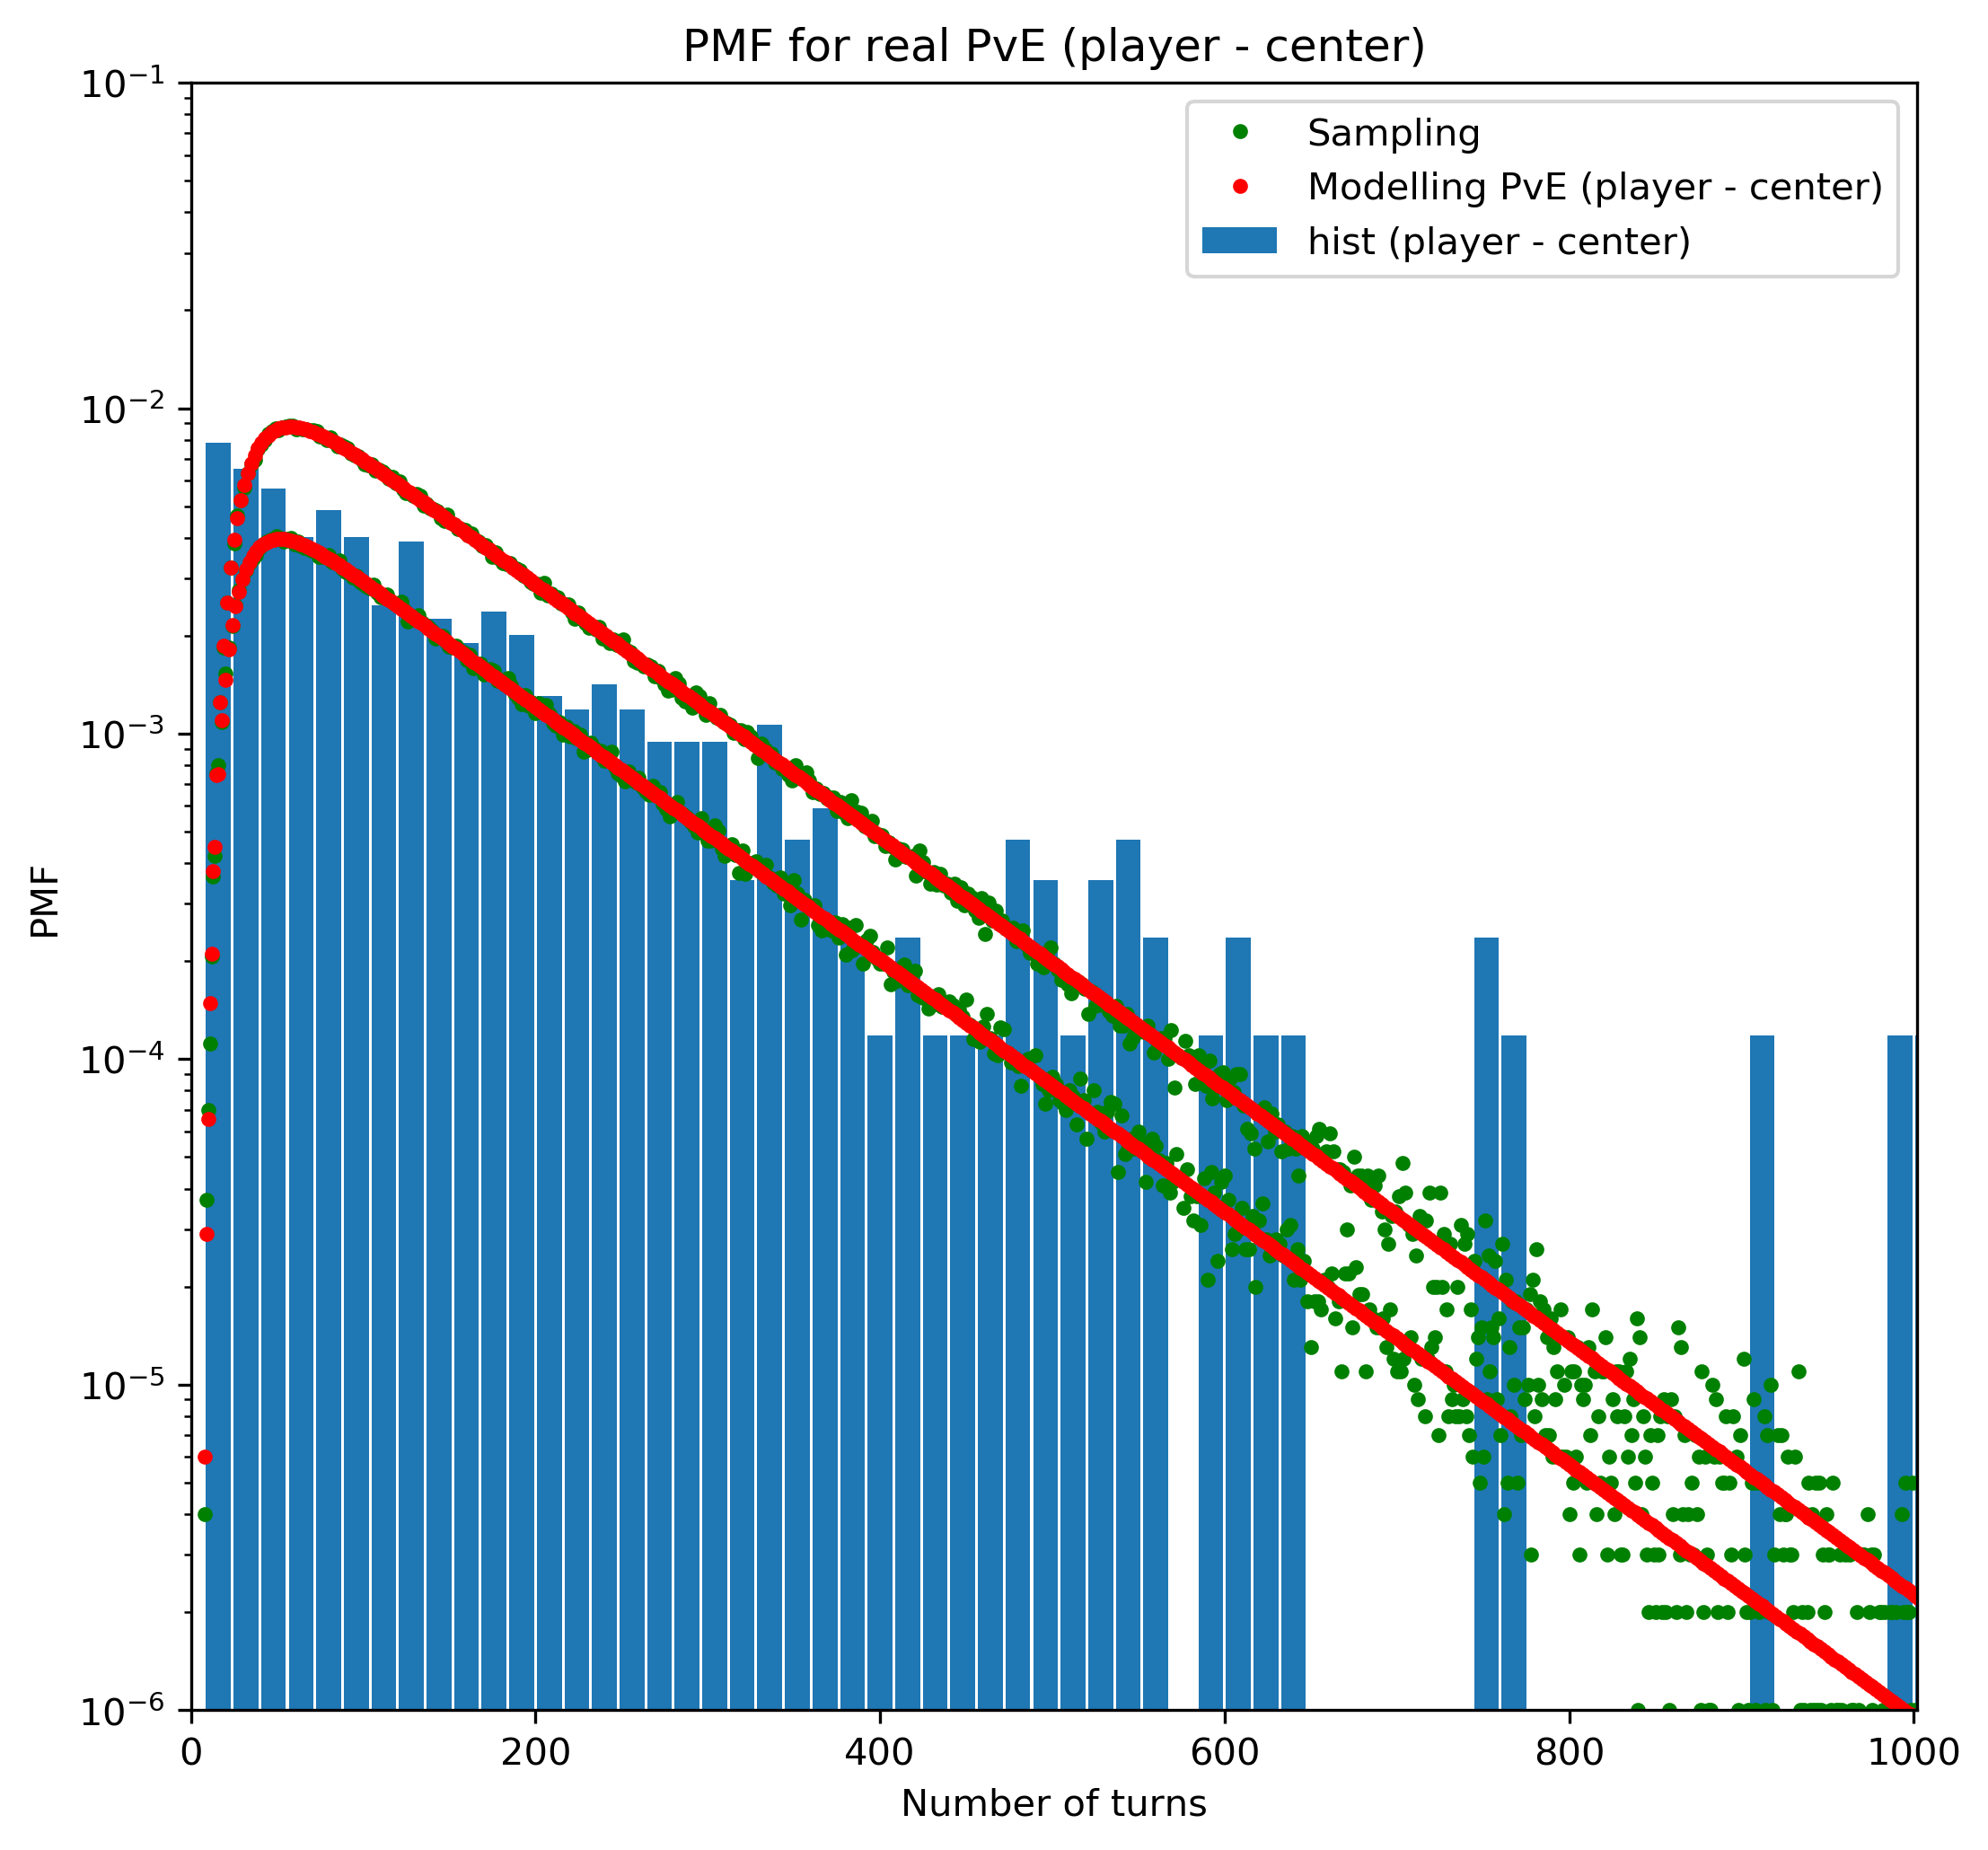

In [30]:
#plt.plot(uniques, pvp_count)
plt.plot(uniques_center, pve_center_count, 'g.', label="Sampling")
plt.xlim([0, max(player_center_turns)])


plt.yscale("log")
plt.xlabel("Number of turns")
plt.ylabel("PMF")
plt.title("PMF for real PvE (player - center)")
plt.ylim(ymin = 0.000001, ymax = 0.1)
plt.hist(player_center_turns, bins=bins_ranges_center, rwidth=0.9, density=True, label="hist (player - center)")

plt.plot(prob_center, 'r.', label="Modelling PvE (player - center)")
plt.legend()
#pvp_count = np.array(pvp_count)
#pvp_count = pvp_count / sum(pvp_count)
plt.show()

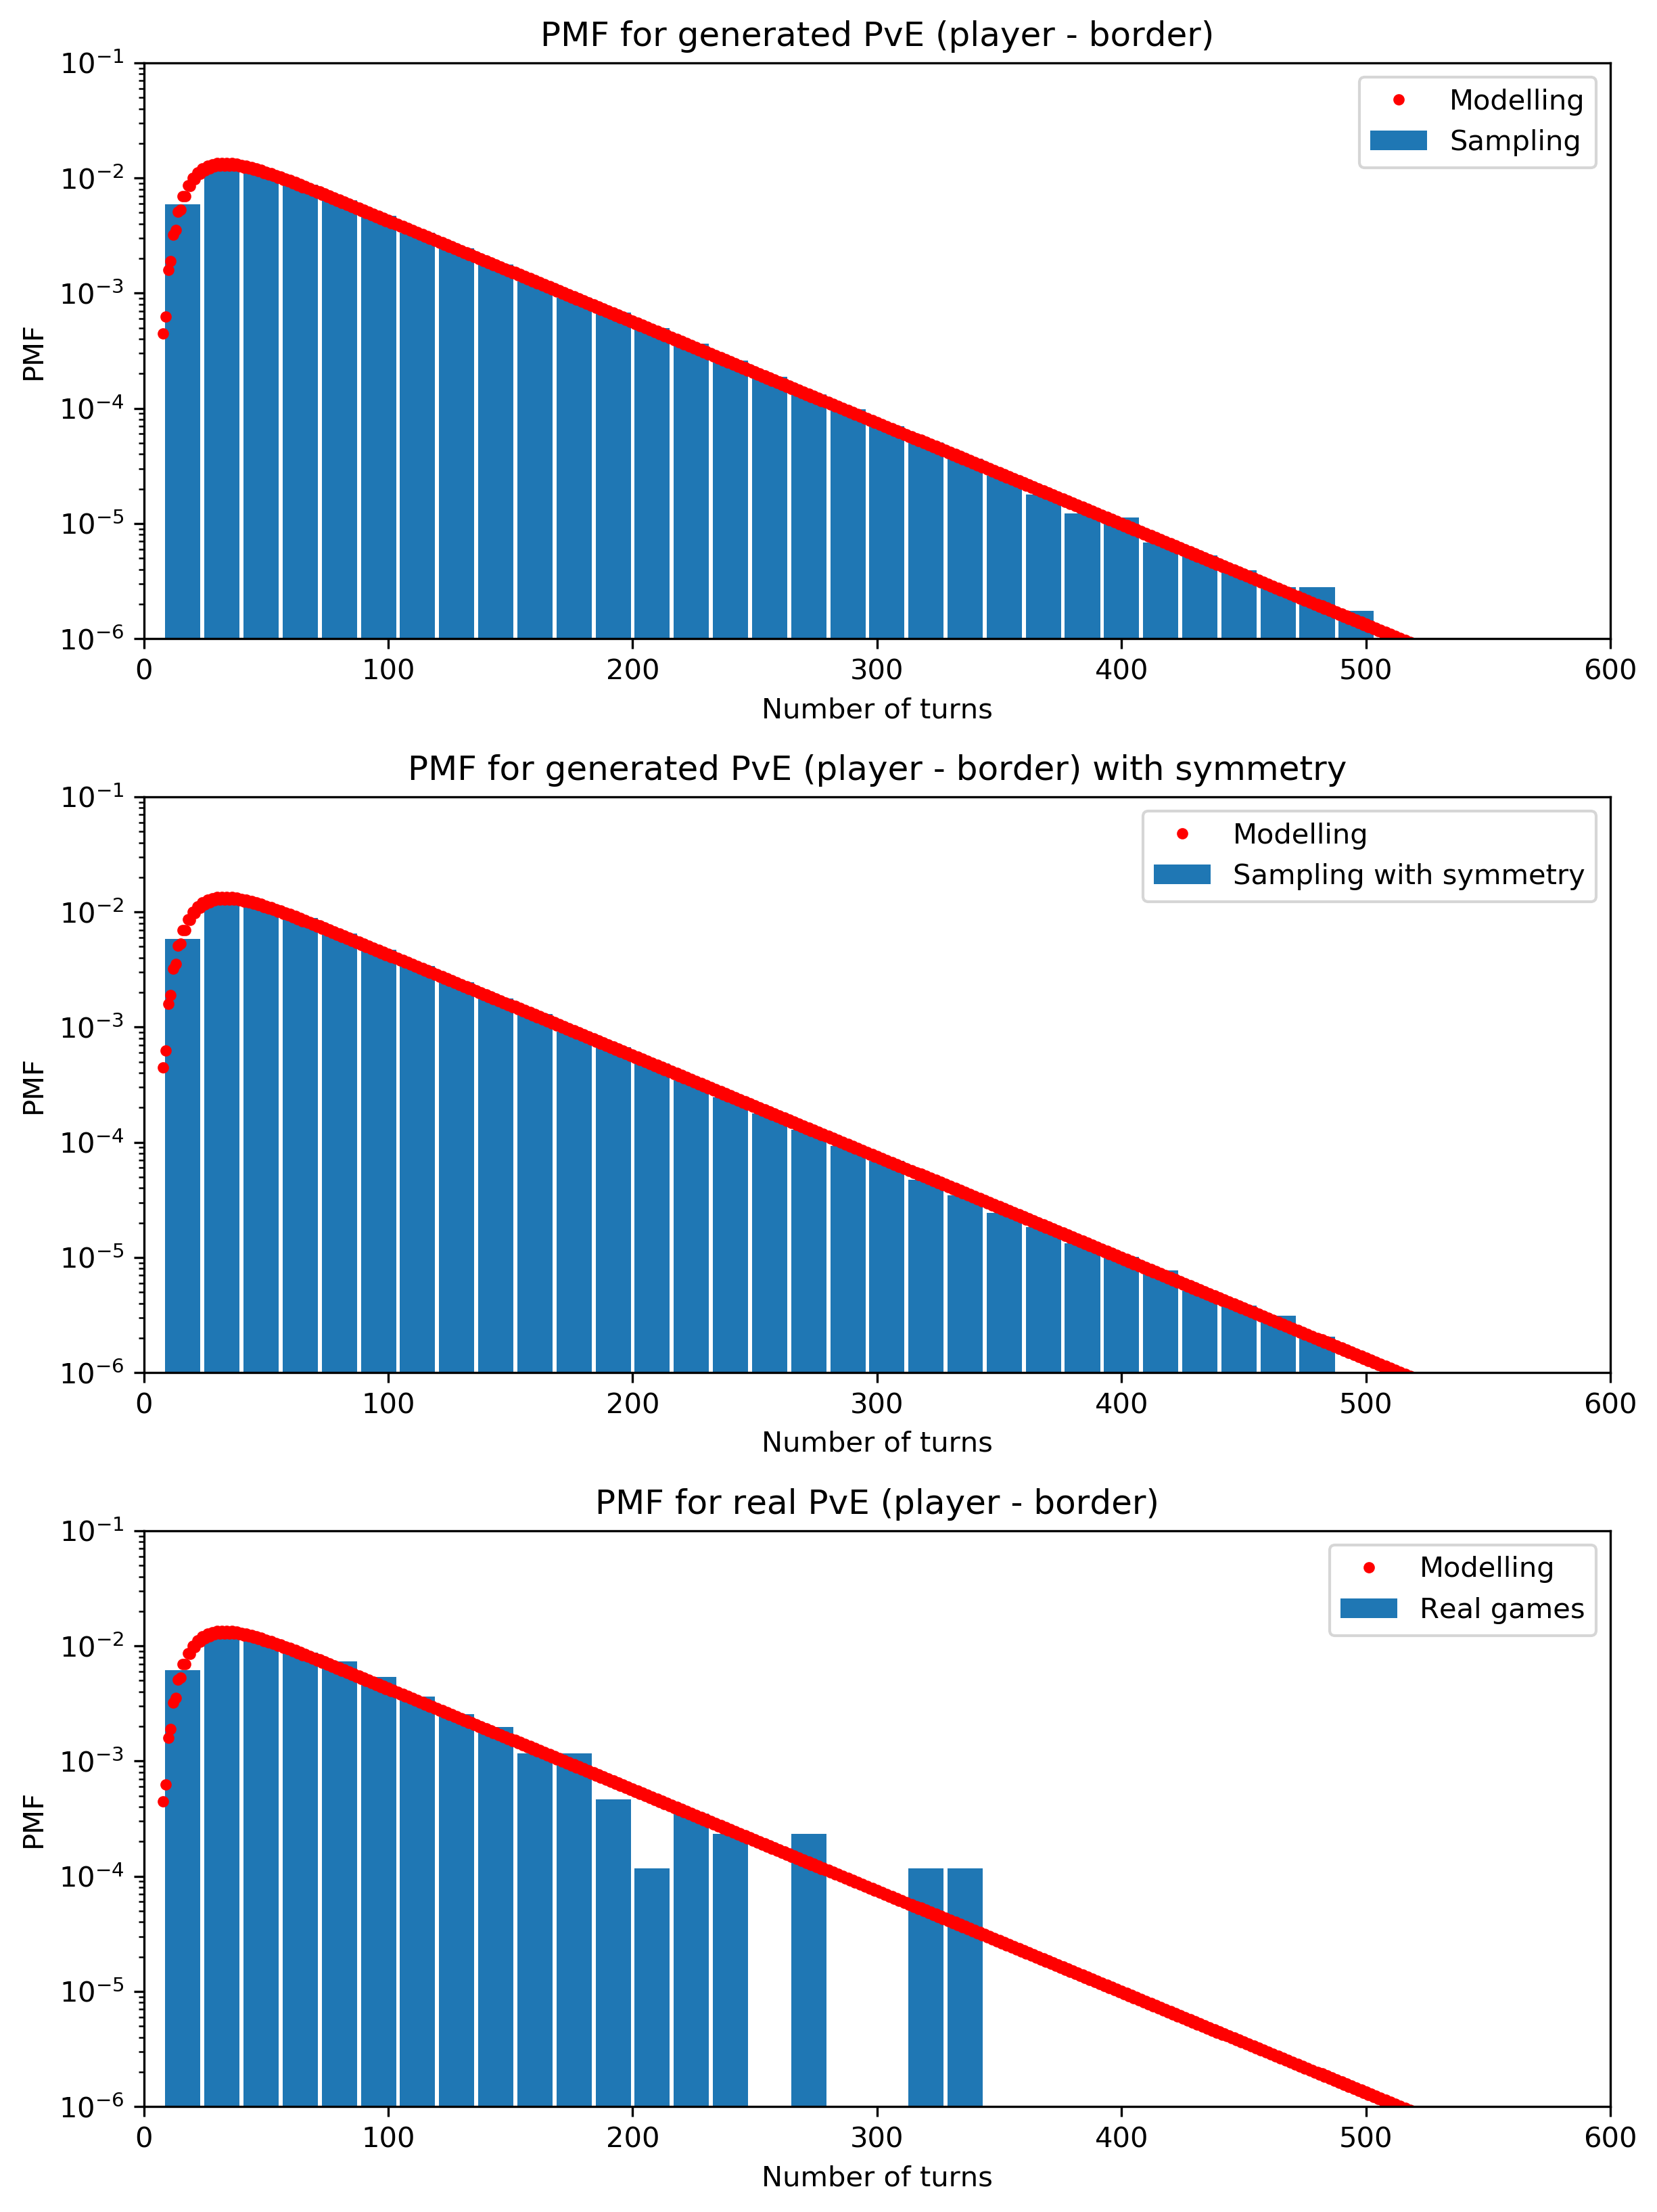

In [31]:
fig, axes = plt.subplots(3, figsize=(8.27, 11))
plt.rcParams['figure.dpi'] = 300
max_x = 600#max(player_border_turns)

axes[0].set_yscale("log")
axes[0].set_xlabel("Number of turns")
axes[0].set_ylabel("PMF")
axes[0].set_title("PMF for generated PvE (player - border)")
axes[0].set_ylim(ymin = 0.000001, ymax = 0.1)
axes[0].set_xlim(xmin = 0, xmax = max_x)
n_pvp_gen, bins_pvp_gen, patches_pvp_gen = axes[0].hist(gen_turns_border, 
                                                        bins=bins_ranges_border, 
                                                        rwidth=0.9, density=True, label='Sampling') 
axes[0].plot(prob_border, 'r.', label='Modelling')
axes[0].legend()

axes[1].set_yscale("log")
axes[1].set_xlabel("Number of turns")
axes[1].set_ylabel("PMF")
axes[1].set_title("PMF for generated PvE (player - border) with symmetry")
axes[1].set_ylim(ymin = 0.000001, ymax = 0.1)
axes[1].set_xlim(xmin = 0, xmax = max_x)
n_pvp_gen_symm, bins_pvp_gen_symm, patches_pvp_gen_symm = axes[1].hist(gen_turns_symm_border, 
                                                                       bins=bins_ranges_border, 
                                                                       rwidth=0.9, density=True,
                                                                       label='Sampling with symmetry') 
axes[1].plot(prob_border, 'r.', label='Modelling')
axes[1].legend()

axes[2].set_yscale("log")
axes[2].set_xlabel("Number of turns")
axes[2].set_ylabel("PMF")
axes[2].set_title("PMF for real PvE (player - border)")
axes[2].set_ylim(ymin = 0.000001, ymax = 0.1)
axes[2].set_xlim(xmin = 0, xmax = max_x)
n_pvp, bins_pvp, patches_pvp = axes[2].hist(player_border_turns, 
                                            bins=bins_ranges_border, 
                                            rwidth=0.9, density=True, label='Real games')
axes[2].plot(prob_border, 'r.', label='Modelling')
axes[2].legend()
fig.tight_layout()
plt.show()